In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

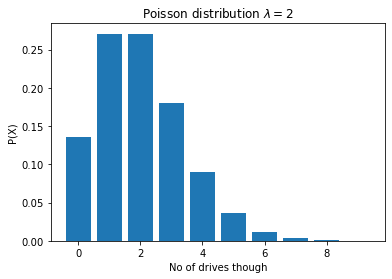

In [22]:
λ = 2
drive_through = stats.poisson(λ)
x = np.arange(0,10)
y = drive_through.pmf(x)
plt.bar(x,y)
plt.xlabel('No of drives though')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 2$');

In [23]:
print(round(drive_through.pmf(0)*100,2), "% no cars")
print(round(drive_through.sf((3)-1)*100,2), "% 3 or more cars")
print(round(drive_through.sf((1)-1)*100,2), "% at least 1 car")

13.53 % no cars
32.33 % 3 or more cars
86.47 % at least 1 car


In [21]:
print((drive_through.rvs(1_000_000) == 0).mean())
print((drive_through.rvs(1_000_000) >= 3).mean())
print((drive_through.rvs(1_000_000) >= 1).mean())

0.134831
0.322924
0.86477


Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?

What GPA constitutes the bottom 15% of the class?

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

If I have a GPA of 3.5, what percentile am I in?

In [33]:
grades_mean = 3
grades_std = .3
grades = stats.norm(grades_mean,grades_std)

In [34]:
print(">=", round(grades.ppf(.95),2), "gpa to be in the top 5%")
# grades.isf(.05)
print("<=", round(grades.ppf(.15),2), "gpa to be in the bottom 15%")
print(round(grades.ppf(.2),2),"> x <", round(grades.ppf(.3),2), 
# range_of_gpa = grades.ppf([.2,.3])
# (range_of_gpa[0] < 2.8) and  (range_of_gpa[1] > 2.8)
"gpa to be in the 3rd decile (20%-30%) \n2.8 would fall within this range")
print(round(grades.cdf(3.5),2), "percentile for 3.5GPA")
# grade.

>= 3.49 gpa to be in the top 5%
<= 2.69 gpa to be in the bottom 15%
2.75 > x < 2.84 gpa to be in the 3rd decile (20%-30%) 
2.8 would fall within this range
0.95 percentile for 3.5GPA


A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [51]:
λ = 2
click_through = stats.poisson(λ)
click_through.cdf((97)/4326)

0.1353352832366127

In [52]:
#from class review
n_trials = 4326
probablity = .02
click_dist = stats.binom(n_trials,probablity)
click_dist.sf(97-1)

0.13975823631416445

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [50]:
correct_guess = stats.binom(60,.01)
correct_guess.sf(0)

0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

83.62 % chance of cleaning 1 day
40.89 % chance of cleaning everyday all week


<BarContainer object of 10 artists>

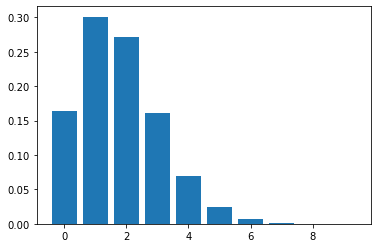

In [56]:
upset_staff = stats.binom((.9*3*22),.03)
print(round(upset_staff.sf(0)*100,2),"% chance of cleaning 1 day")
## wrong - print(round((upset_staff.sf(0)**5)*100,2),"% chance of cleaning everyday all week")
## wrong - print(round((upset_staff.sf(1)**5)*100,2),"% chance for 2 days no clean")
#stats.binom((.9*3*22)*2,.03).pmf(0) # for 2 days no clean
#stats.binom((.9*3*22)*5,.03).pmf(0) # for 5 days no clean
x = np.arange(0,10)
y = stats.binom((.9*3*22),.03).pmf(x)
plt.bar(x,y)

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is 
normally distributed with a mean of 15 and standard deviation of 3. 

If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [58]:
line_ppl_mean = 15
line_ppl_std = 3
# create a scipy object/instance of this distribution
line_ppl = stats.norm(line_ppl_mean,line_ppl_std)
person_order_time = 2
food_prep = 10
eat_time = 15
ttl_time = 60
max_avail_time = ttl_time - eat_time - food_prep - 2 #the hardcoded 2 is 2 minutes for me to order
print(round(max_avail_time,2), "minutes avail to wait in line")
ppl_max_wait = max_avail_time/person_order_time
print(round(line_ppl.cdf(ppl_max_wait)*100,2), "% chance of being able to eat food in time")

33 minutes avail to wait in line
69.15 % chance of being able to eat food in time


Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?


In [60]:
from get_db_url import get_db_url 
import env
host = env.host
username = env.username
password = env.password
url = get_db_url(username,host,password,"employees")
sql = '''
SELECT
    *
FROM employees
'''
employees_df = pd.read_sql(sql, url)
sql5 = '''
SELECT
    *
FROM salaries
'''
salaries_df = pd.read_sql(sql5, url)
employees_df=pd.merge(employees_df,salaries_df,on="emp_no",how="inner")

In [61]:
current_employees_df = employees_df[(employees_df["to_date"] == employees_df.to_date.max())]
print(round((current_employees_df.salary < 60_000).mean()*100,2), "% earn less than 60,000")
print(round((current_employees_df.salary > 95_000).mean()*100,2), "% earn more than 95,000")
print(round((
            (current_employees_df.salary < 80_000) 
            & 
            (current_employees_df.salary > 65_000)
            ).mean()*100,2), "% earn betweekn 65k and 80k")
print(round((current_employees_df.salary.nlargest(int(len(current_employees_df)*.05)).mean()),2),"mean of top 5%")

27.06 % earn less than 60,000
10.86 % earn more than 95,000
32.51 % earn betweekn 65k and 80k
113408.82 mean of top 5%


In [62]:
emp_std = (current_employees_df.salary.std())
emp_avg = (current_employees_df.salary.mean())
print(round(emp_std,2),"emp stand dev \n",round(emp_avg,2),"emp mean")
emp_sal = stats.norm(emp_avg,emp_std)
print(round(emp_sal.cdf( 60000 ) * 100, 2),"% more than 95k")
print(round(emp_sal.sf( 95000 ) * 100, 2),"% more than 95k")
print(round((emp_sal.cdf(80000) - emp_sal.cdf(65000)),2) * 100,"% between 65k and 80k")
# np.diff(empl_sal.cdf([65000,80000]))
print(round((emp_sal.ppf(.95)),2),"bottom of the wage top 5%")


17310.0 emp stand dev 
 72012.24 emp mean
24.39 % more than 95k
9.21 % more than 95k
34.0 % between 65k and 80k
100484.64 bottom of the wage top 5%


- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable     
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point   
   -- isf: greater than a point  
- rvs for random values 